In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [10]:
#uploading the file
from google.colab import files
data_to_load = files.upload()

Saving Retail-data.csv to Retail-data (1).csv


In [11]:
#renaming and reading the file
import io
df = pd.read_csv(io.BytesIO(data_to_load ['Retail-data.csv']))

***Data Analysis***

In [12]:
#checking all the columns of the dataframe using random sampling
pd.set_option("display.max_columns",df.shape[1])
df.sample(2)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
42871,12-11-2021 13:00,4.556480e+12,5.302910e+12,6.736900e+12,3.89,3.999620e+13,1,7.14,-0.36,0.0,6.78,0.0,0.60,7.38,1,1,0,#9456,Rice & Rice products,TRS Poha/White Rice Flakes - Thick,TRS,1 kg,Point of Sale
86369,06-04-2022 19:00,4.712460e+12,5.329000e+12,0.000000e+00,6.56,0.000000e+00,1,10.84,0.00,0.0,10.84,0.0,2.28,13.12,1,1,0,#17585,NaN,Cluster beans/ Goru chikkudu/ Kothavaranga (82...,NaN,NaN,Point of Sale


In [13]:
#checking the number of rows and columns in the dataframe
df.shape

(101929, 23)

In [14]:
#checking the type of values under each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hour                    101929 non-null  object 
 1   order_id                101929 non-null  float64
 2   customer_id             101929 non-null  float64
 3   product_id              101929 non-null  float64
 4   product_price           101929 non-null  float64
 5   variant_id              101929 non-null  float64
 6   orders                  101929 non-null  int64  
 7   gross_sales             101929 non-null  float64
 8   discounts               101929 non-null  float64
 9   returns                 101929 non-null  float64
 10  net_sales               101929 non-null  float64
 11  shipping                101929 non-null  float64
 12  taxes                   101929 non-null  float64
 13  total_sales             101929 non-null  float64
 14  ordered_item_quantit

In [15]:
#converting the 'hour' column into DateTime format
df['hour'] = pd.to_datetime(df['hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   hour                    101929 non-null  datetime64[ns]
 1   order_id                101929 non-null  float64       
 2   customer_id             101929 non-null  float64       
 3   product_id              101929 non-null  float64       
 4   product_price           101929 non-null  float64       
 5   variant_id              101929 non-null  float64       
 6   orders                  101929 non-null  int64         
 7   gross_sales             101929 non-null  float64       
 8   discounts               101929 non-null  float64       
 9   returns                 101929 non-null  float64       
 10  net_sales               101929 non-null  float64       
 11  shipping                101929 non-null  float64       
 12  taxes                   101929

In [16]:
#checking the statistical parameters of values under each column
df.describe()

,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity
count,1.019290e+05,1.019290e+05,1.019290e+05,101929.000000,1.019290e+05,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000
mean,4.166395e+12,4.646366e+12,5.164254e+12,3.029806,3.107043e+13,0.934925,6.113423,-0.158969,-0.019399,5.935055,0.004022,0.530069,6.469145,1.080939,1.078486,-0.002453
std,1.084800e+12,1.895350e+12,2.765212e+12,3.000681,1.654758e+13,0.246659,6.179441,0.994381,0.674285,6.052408,0.218740,0.701146,6.655866,0.620989,0.626493,0.059214
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-69.500000,-90.060000,-90.060000,-11.480000,-18.920000,-108.980000,0.000000,-7.000000,-7.000000
25%,4.013270e+12,5.269060e+12,5.908390e+12,1.350000,3.696630e+13,1.000000,2.800000,0.000000,0.000000,2.740000,0.000000,0.160000,2.980000,1.000000,1.000000,0.000000
50%,4.580600e+12,5.283720e+12,6.659360e+12,2.390000,3.994250e+13,1.000000,4.720000,0.000000,0.000000,4.560000,0.000000,0.380000,4.980000,1.000000,1.000000,0.000000
75%,4.677140e+12,5.380540e+12,6.747460e+12,3.790000,4.017080e+13,1.000000,7.320000,0.000000,0.000000,7.300000,0.000000,0.660000,7.960000,1.000000,1.000000,0.000000
max,4.766070e+12,6.229830e+12,7.706230e+12,129.000000,4.304960e+13,1.000000,213.220000,0.000000,31.320000,213.220000,11.480000,44.780000,258.000000,24.000000,24.000000,0.000000


In [17]:
#transposing the above readings , for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,101929.0,4.166395e+12,1.084800e+12,0.00,4.013270e+12,4.580600e+12,4.677140e+12,4.766070e+12
customer_id,101929.0,4.646366e+12,1.895350e+12,0.00,5.269060e+12,5.283720e+12,5.380540e+12,6.229830e+12
product_id,101929.0,5.164254e+12,2.765212e+12,0.00,5.908390e+12,6.659360e+12,6.747460e+12,7.706230e+12
product_price,101929.0,3.029806e+00,3.000681e+00,0.00,1.350000e+00,2.390000e+00,3.790000e+00,1.290000e+02
variant_id,101929.0,3.107043e+13,1.654758e+13,0.00,3.696630e+13,3.994250e+13,4.017080e+13,4.304960e+13
orders,101929.0,9.349253e-01,2.466588e-01,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
gross_sales,101929.0,6.113423e+00,6.179441e+00,0.00,2.800000e+00,4.720000e+00,7.320000e+00,2.132200e+02
discounts,101929.0,-1.589695e-01,9.943808e-01,-69.50,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
returns,101929.0,-1.939880e-02,6.742853e-01,-90.06,0.000000e+00,0.000000e+00,0.000000e+00,3.132000e+01
net_sales,101929.0,5.935055e+00,6.052408e+00,-90.06,2.740000e+00,4.560000e+00,7.300000e+00,2.132200e+02


In [18]:
#checking the count of null values 
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [19]:
#checking the unique values under each column
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


#Customer Analysis

###Find out the avg orders and avg totalsales per customers?


In [20]:
AvgOrders_AvgTotalSales = pd.DataFrame(df.groupby('customer_id')['orders','total_sales'].mean())
AvgOrders_AvgTotalSales
AvgOrders_AvgTotalSales.rename(columns = {'orders':'avg_orders','total_sales':'avg_total_sale'}, inplace = True)
AvgOrders_AvgTotalSales

<ipython-input-20-7329d985eb32>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AvgOrders_AvgTotalSales = pd.DataFrame(df.groupby('customer_id')['orders','total_sales'].mean())


,avg_orders,avg_total_sale
customer_id,,
0.000000e+00,0.582237,3.449801
3.949750e+12,0.638298,3.767234
3.978020e+12,0.983607,4.033279
3.978050e+12,1.000000,2.446667
3.980040e+12,0.990071,6.250043
...,...,...
6.224930e+12,0.909091,7.962727
6.225480e+12,0.941176,6.635294
6.227300e+12,1.000000,29.500000


Text(0.5, 1.0, 'Customer-wise avg. orders and avg. total sale')

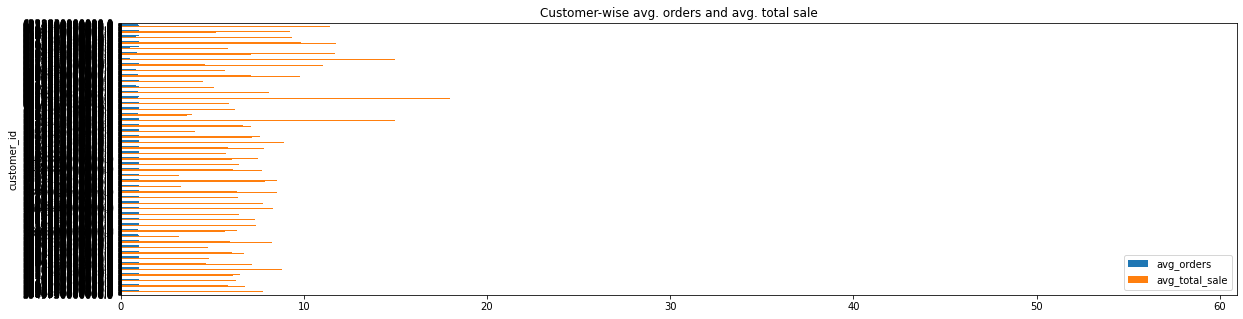

In [33]:
AvgOrders_AvgTotalSales.plot(kind='barh',figsize=(20,5));
plt.title("Customer-wise avg. orders and avg. total sale")

### 2.Find out the customer first and last purchase to identity the no of days the customer is with us?

In [22]:
last_date = pd.DataFrame(df.groupby('customer_id')['hour'].max())
first_date = pd.DataFrame(df.groupby('customer_id')['hour'].min())
last_first_date = pd.merge(left=last_date,right=first_date,on='customer_id',how='inner')
duration = last_first_date['hour_x']-last_first_date['hour_y']
last_first_date['duration']=duration
last_first_date
last_first_date.rename(columns = {'hour_x':'last date','hour_y':'first date'}, inplace = True)
last_first_date

,last date,first date,duration
customer_id,,,
0.000000e+00,2022-12-05 23:00:00,2021-01-06 00:00:00,698 days 23:00:00
3.949750e+12,2022-09-04 19:00:00,2021-01-06 20:00:00,605 days 23:00:00
3.978020e+12,2022-12-02 13:00:00,2021-02-10 11:00:00,660 days 02:00:00
3.978050e+12,2021-10-07 20:00:00,2021-10-07 20:00:00,0 days 00:00:00
3.980040e+12,2022-12-03 13:00:00,2021-01-08 16:00:00,693 days 21:00:00
...,...,...,...
6.224930e+12,2022-05-26 11:00:00,2022-05-22 12:00:00,3 days 23:00:00
6.225480e+12,2022-05-22 20:00:00,2022-05-22 20:00:00,0 days 00:00:00
6.227300e+12,2022-05-24 13:00:00,2022-05-24 13:00:00,0 days 00:00:00


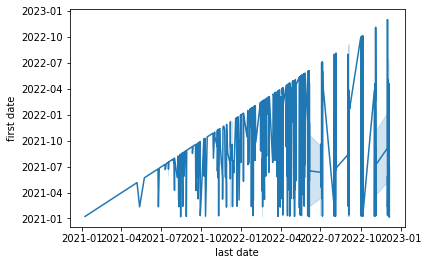

In [50]:
sns.lineplot(x="last date", y="first date",     
             data=last_first_date)

###3. Find out the Customer purchase frequency?

In [24]:
frequency = pd.DataFrame(df.groupby('customer_id')['order_id'].count())
frequency

,order_id
customer_id,
0.000000e+00,14288
3.949750e+12,47
3.978020e+12,122
3.978050e+12,3
3.980040e+12,705
...,...
6.224930e+12,22
6.225480e+12,17
6.227300e+12,1


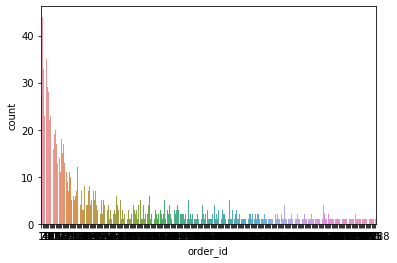

In [25]:
sns.countplot(x='order_id',data=frequency)

### 4.What is the highest and least purchases done by the customers?

In [26]:
hi_purchase = df.groupby(['customer_id'])[['total_sales']].max()
low_purchase = df.groupby(['customer_id'])[['total_sales']].min()
hi_low_purchase = pd.merge(left=hi_purchase,right=low_purchase,on='customer_id',how='inner')
hi_low_purchase
hi_low_purchase.rename(columns={'total_sales_x':'highest_purchase','total_sales_y':'lowest_purchase'},inplace='True')
hi_low_purchase

,highest_purchase,lowest_purchase
customer_id,,
0.000000e+00,146.86,-83.86
3.949750e+12,31.96,-13.90
3.978020e+12,16.58,-1.90
3.978050e+12,3.78,1.78
3.980040e+12,39.98,-11.90
...,...,...
6.224930e+12,21.90,0.00
6.225480e+12,16.98,0.00
6.227300e+12,29.50,29.50


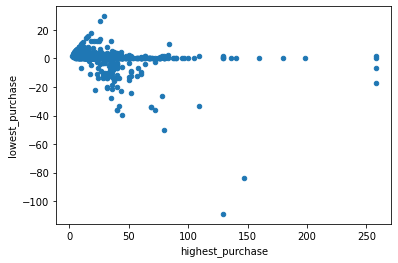

In [27]:
hi_low_purchase.plot(kind='scatter',x='highest_purchase',y='lowest_purchase')

Text(0.5, 1.0, 'Customer-wise Highest and Lowest Purchases')

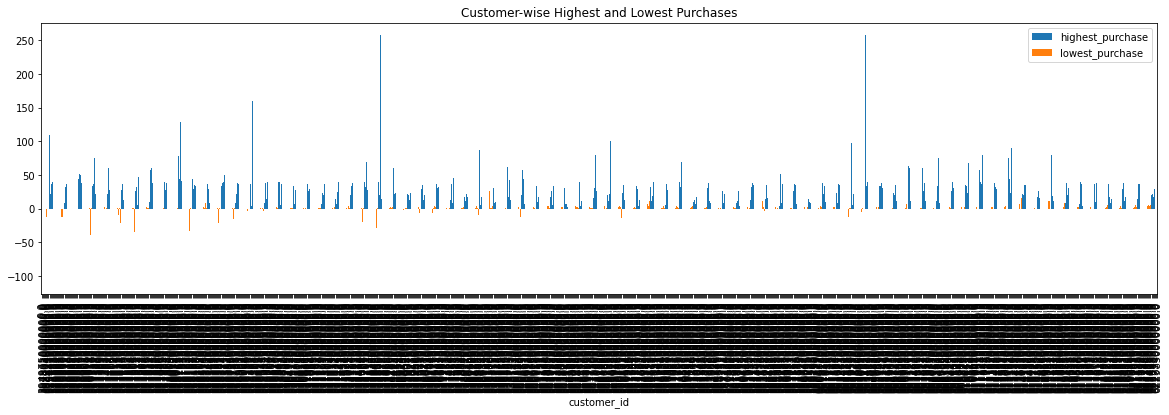

In [38]:
hi_low_purchase.plot(kind='bar',figsize=(20,5));
plt.title("Customer-wise Highest and Lowest Purchases")

### 5. No of days difference between each purchase made by customers?

### 6.Most purchased product by a customer?

In [29]:
most_purchased_product = (df.groupby(['customer_id','product_title'])['product_title'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('customer_id', keep='first'))
most_purchased_product

,customer_id,product_title,count
0,0.000000e+00,Dbanyan Tas,158
14,5.268980e+12,Garam Idly Dosa Batter,37
18,5.268680e+12,Coriander Leaves (Per stuk),35
21,5.276120e+12,Garam Idly Dosa Batter,33
26,5.314380e+12,Haldiram's Gobhi Paratha (Frozen),32
...,...,...,...
60464,5.283580e+12,Double Deer Basmati Rice,1
60555,5.283260e+12,TRS Kashmiri Chilli Whole,1
60556,5.283270e+12,Kohinoor Extra Long Gold Basmati Rice,1
60557,5.283290e+12,Daily Delight - Okra Cut,1


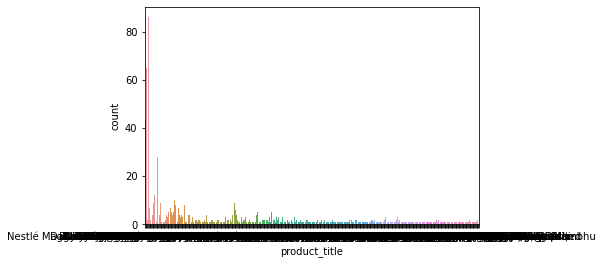

In [30]:
sns.countplot(x='product_title',data=most_purchased_product)

### 7.Find the Top 5 customers with most orders?

In [31]:
cust_most_order = df.groupby('customer_id')[['orders']].sum().sort_values(by='orders',ascending=False).reset_index()
cust_most_order.head()

,customer_id,orders
0,0.000000e+00,8319
1,5.268980e+12,707
2,3.980040e+12,698
3,5.268960e+12,680
4,5.278330e+12,648


Text(0.5, 1.0, '5 Customers who has purchased the most with the number of purchases')

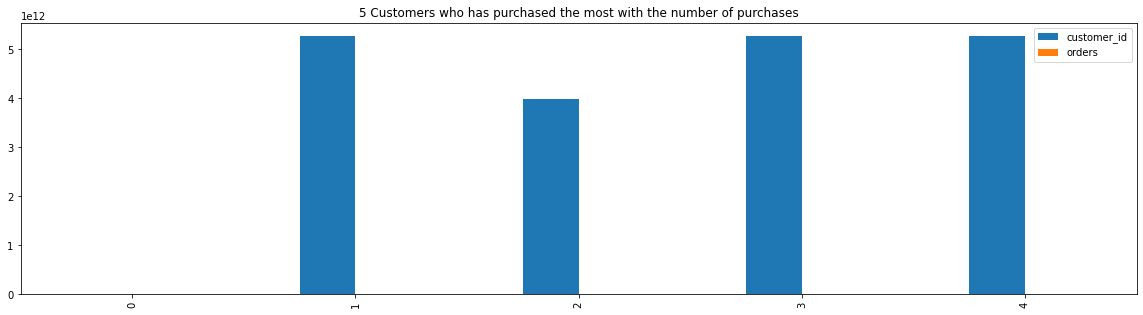

In [35]:
cust_most_order.head().plot(kind='bar',figsize=(20,5));
plt.title("5 Customers who has purchased the most with the number of purchases")